# Visualize Ticker Features

This notebook loads and visualizes the features for a single ticker.

,Open,High,Low,Close,Volume,Volume_Prev,Dividends,Stock Splits,RSI,MACD,...,BB_Lower,BB_Middle,BB_Pband,SMA_20,SMA_50,SMA_100,SMA_200,EMA_100,EMA_200,analyst_targets
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-28,461.220001,462.519989,456.929993,457.359985,17086300,20974300.0,0.0,0.0,68.803258,15.910729,...,413.152031,443.916896,0.718481,443.916896,405.548619,NaN,NaN,NaN,NaN,None
2025-05-29,461.549988,461.720001,455.309998,458.679993,13974800,17086300.0,0.0,0.0,69.438602,15.396941,...,425.648044,447.124110,0.769041,447.124110,407.065875,NaN,NaN,NaN,NaN,None
2025-05-30,459.720001,461.679993,455.540009,460.359985,34770500,13974800.0,0.0,0.0,70.268513,14.952954,...,429.361073,448.911087,0.792810,448.911087,408.530888,NaN,NaN,NaN,NaN,None
2025-06-02,457.140015,462.109985,456.890015,461.970001,16605500,34770500.0,0.0,0.0,71.079060,14.563131,...,431.125178,450.285469,0.804915,450.285469,410.047666,NaN,NaN,NaN,NaN,None
2025-06-03,461.470001,464.114990,460.862213,463.299988,9004683,16605500.0,0.0,0.0,71.763867,14.197848,...,433.008369,451.681932,0.811083,451.681932,411.502805,NaN,NaN,NaN,NaN,"{""current_price"": 463.3, ""median_target"": 509...."


Sector for MSFT: Technology


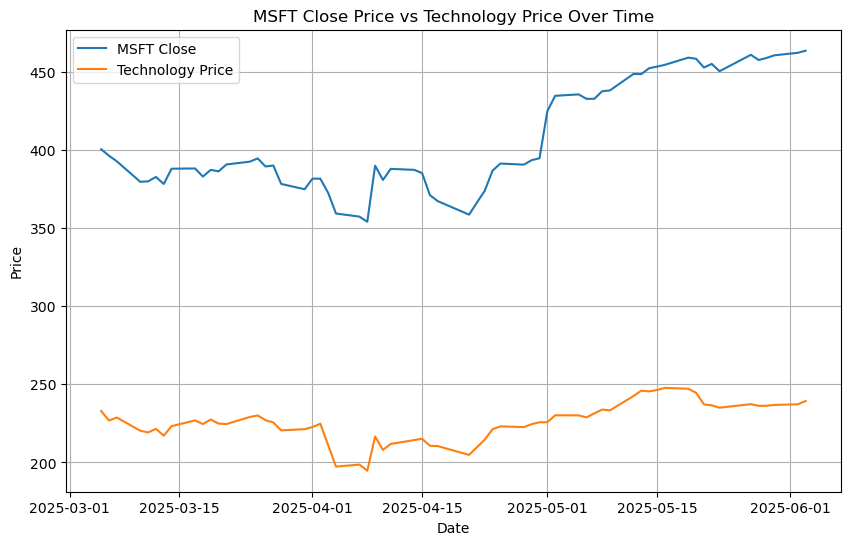

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the ticker's features from the Parquet file
ticker = 'MSFT'  # Change this to the desired ticker
df = pd.read_parquet(f'../data/features/{ticker}_features.parquet')

# Display the last few rows
display(df.tail())

# Load the sector mapping from JSON
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

# Get the sector for the ticker
sector = sector_dict.get(ticker, 'Unknown')
print(f"Sector for {ticker}: {sector}")

# Load the sector's Parquet file
sector_df = pd.read_parquet(f'../data/market_features/sectors/{sector}.parquet')

# Plot the ticker's 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label=f'{ticker} Close')

# Overlay the sector's 'price' data
plt.plot(sector_df.index, sector_df['price'], label=f'{sector} Price')

plt.title(f'{ticker} Close Price vs {sector} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()